# Homework: Object Detection with YOLO and OpenCV

***Summary***
- Surveillance: Bag and Cell Phone Detection
- Autonomous Driving: Objected Detection

**Author List**: Chad Wakamiya (Summer 2020) <br>

***
## Prequisites
1. **Before beginning make sure you have installed ImageAI and OpenCV.** You can install ImageAI by reading the [installation steps](https://imageai.readthedocs.io/en/latest/index.html) from the official documentation. Throughout this notebook, we will use the ImageAI implementation of YOLO for image and video object detection. Note that other YOLO implementations exist and you may want to explore alternative libraries for your project. ImageAI offers one of the most user-friendly interfaces for YOLO so it was selected for this module, however, other libraries may offer more flexibility and customization.
2. **Download the pretrained YOLO model.** Go to https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0/, download `yolo.h5`, and move this file into your local directory with this notebook.


## 1. Surveillance: Bag and Cell Phone Detection

**Q1 a) Use ImageAI to run a pretrained YOLO model object detection model on `pedestrians.jpg`. Store the detected objects in a list called `detections`. How many objects are detected?**
- Use the `yolo.h5` pretrained model
- Set the `minimum_percentage_probability = 0`

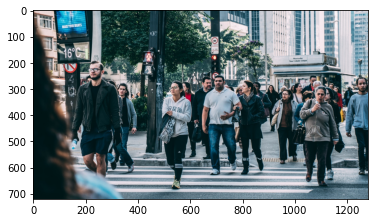

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

image = cv2.imread('data/crosswalk.jpg')

# Remember OpenCV reads images as BGR so we must convert to RGB for the image to appear correctly.
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb);

In [7]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

#### YOUR CODE HERE ###

#for eachObject in detections:
#    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
#    print("--------------------------------")
    
#print('Number of Objects Detected: ', len(detections))

**Q1 b) Use OpenCV to draw shapes around objects of interest.**
 - Red rectangles around  <font color=red>cell phones</font>.
 - Green rectangles around <font color=green>handbags</font>.

Your labeled image should look like: <br>
<img src="assets/crosswalk_sol.jpg" alt="Drawing" style="width: 500px;"/>

In [8]:
#### YOUR CODE HERE ###

#plt.figure(figsize = (15,15))
#plt.imshow(image);

## 2. Autonomous Driving: Objected Detection

In this problem, we will use the ImageAI YOLO implementation to identify objects in front of a car using dashcam footage.

In [9]:
from IPython.display import Video
Video("./data/dashcam.mp4", width = 500)

**Q2 a) Write a function called `forFrame` that records detected objects from each frame of the video.**
 - Use a global variable called `detected_objects`
 - For each frame in the video, the inputs to the `forFrame` function are:
     - 'frame_number': int, current frame number
     - 'output_array': list of dictionaries, each dictionary represents one detected object in that frame. Each dictionary has 3 keys to specify a unique bounding box: 'name', 'percentage_probability', and 'box_points'.
     - 'output_count': dictionary, the key is the name of the object and the value is the number of instances of that object that appear in the frame.
 - For each frame, we want to know the location of the bounding boxes, so append 'output_array' to `detected_objects`. We don't need to keep track of the 'frame_number' or 'output_count' for our use case.
 - Read about how to write a `forFrame` method at the [ImageAI documentation](https://imageai.readthedocs.io/en/latest/video/index.html). 
 
 
 *Hint: You can complete the function with 1 line of code.*

In [11]:
# Define a global variable to store the 'output_array' list of dictionaries for each frame.
detected_objects = []    

def forFrame(frame_number, output_array, output_count):
    
    #### YOUR CODE HERE ###
    ...

**Q2 b) Use ImageAI to run a pretrained YOLO model object detection model on `./data/dashcam.mp4`. Store the detected objects in a list called `detections`. After running the model of the video, check that the length of `detected_objects` equals the number of frames to verify that data was collected.**
- Use the `yolo.h5` pretrained model
- Set the `minimum_percentage_probability = 30`
- Set the `frames_per_second = 20`
- `dashcam.mp4` has 200 frames so this code may 3-5 minutes to run. While testing your code, we recommend using `dashcam_Trim.mp4` a 0.01 second clip that only has 38 frames so the following code will run in under a minute.

In [12]:
from imageai.Detection import VideoObjectDetection
import os

execution_path = os.getcwd()

# Pass video into YOLO model and detect objects


#### YOUR CODE HERE ###


#print('Number of frames we collected data for: ', len(detected_objects))

**Q2 c) Create a function `bounding_box_area`that calculates the area of a bounding box. The input is 'box_points' a list of coordinates [x1, y1, x2, y2] where (x1, y1) is the upper left corner and (x2, y2) is the lower right corner of the bounding box.**

In [14]:
def bounding_box_area(bounding_box_points):
    
    #### YOUR CODE HERE ###
    ...


**Q2 d) Fill in the following code to draw shapes on top of the dashcam footage to help the car detect objects in front of it. This problem contains multiple steps where you will:**
- Draw a trapezoid in front of the car to represent the car's path.
- Draw a line in front of the car to show a fixed distance in front of the car.
- Draw rectangles around detected objects with colors and border thicknesses representing their proximity to the car. 
 
After completing the code below, you should create a video that looks like: <br>
 ![driving_demo](assets/autonomous_driving_demo.gif "segment")

*Note: We will save the video we create with the shapes drawn on top as `dashcam_edited.mp4`.*
 
1.  Draw a **trapezoid** with vertices:
    - `(t_x1, t_y1), (t_x2, t_y2), (t_x3, t_y3), (t_x4, t_y4)`
    - Use a thickness of 2 px and <font color=blue>blue</font>.
    - Read how to draw polygons (trapezoids) at [OpenCV Tutorials](https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html).

2.  Draw a **line** with edge points:
    - `(x1, y1), (x2, y2)`
    - Use a thickness of 2 px and  <font color=red>red</font>.
 
3.  Draw the **rectangles** around detected objects.
    - The color and border thickness should depend on the area of the bounding box.
    - Use `bounding_box_area` from **2Q c** to calculate the area of each bounding box and compare it to the area of the entire frame `h*w`  
    - If the area of the detected bounding box is **greater than 10%** of the area of the entire frame, the rectangle should be <font color=red>red</font> and 15 px.
    - If the area of the detected bounding box is **between 2-10%** of the area of the entire frame, the rectangle should be yellow and 7 px.
    - If the area of the detected bounding box is **less than or equal to 2%** of the area of the frame, the rectangle should be <font color=green>green</font> and 3 px.
    
*Hint*: You should use `frame_counter` to keep track of the current frame. You can then use `frame_counter` to index into `detected_objects` to get the list of objects for that frame.

In [15]:
import numpy as np
import cv2

# Read in video file (can be a .mp4 or .avi file)
cap = cv2.VideoCapture('data/dashcam.mp4')

w  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('dashcam_edited.mp4',fourcc, 20.0, (w, h))

# We need to count which frame we are on, so we can index the corresponding frame in detected_objects
frame_counter = 0

while(cap.isOpened()):
    # Checks if video is read in correctly
    ret, frame = cap.read()
    
    if ret==True:    
        # Resize frame
        frame_resized = cv2.resize(frame, (w, h))
           
        ########################################################
        ### 1. DRAW THE TRAPEZOID ###
        
        #(t_x1, t_y1), (t_x2, t_y2), (t_x3, t_y3), (t_x4, t_y4) 
        trapezoid_vertices = [[5.5/10*w, 6/10*h],[4.5/10*w, 6/10*h],[0*w, h],[1*w, h]]
        
        # Draw a blue trapezoid with thickness of 2 px
        ### YOUR CODE HERE###
        
        ########################################################
        ### 2. DRAW THE RED LINE ###
        
        # Specify the endpoints of the line segment
        x1, y1 = int(2.25/10*w), int(8/10*h)
        x2, y2 = int(7.75/10*w), int(8/10*h)
        # Draw a horizontal red line with thickness of 2 px
        ### YOUR CODE HERE###
        
        ########################################################
        ### 3. DRAW THE BOUNDING BOXES ###        
        
        ### YOUR CODE HERE###
                
        ########################################################
        frame_counter += 1
        
        # Write the current frame to the output video 
        out.write(frame_resized)
        
        # Display the video in real time as it is written to the output video. (You can comment this line out if you don't want to see the video)
        cv2.imshow('frame', frame_resized)

        # Waits 100 milliseconds to see if the the 'q' key is pressed. If 'q' is pressed, the video stops and the window closes, else moves on to next frame.
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()